In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from pandas.core import datetools

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

data = pd.read_csv('nba_2017_players_stats_combined.csv')
data.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


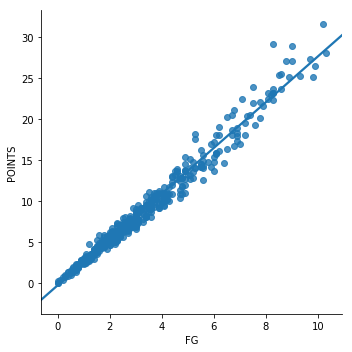

In [4]:
sns.lmplot(x='FG', y='POINTS', data=data, ci=None)

In [32]:
data['FT%']=data['FT%'].replace(data['FT%'][data['FT%']>=0.5], 1)
data['FT%']=data['FT%'].replace(data['FT%'][data['FT%']<0.5], 0)
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 

In [33]:
data.isnull().sum()

Unnamed: 0    0
Rk            0
PLAYER        0
POSITION      0
AGE           0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
POINTS        0
TEAM          0
GP            0
MPG           0
ORPM          0
DRPM          0
RPM           0
WINS_RPM      0
PIE           0
PACE          0
W             0
intercept     0
dtype: int64

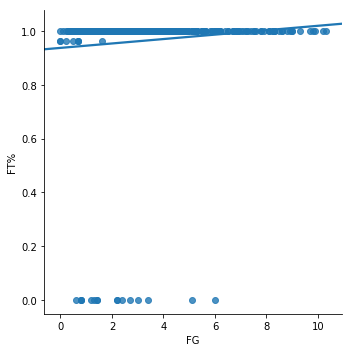

In [34]:
sns.lmplot(x='FG', y='FT%', data=data, ci=None)

In [35]:
# Adding intercept manually
data['intercept'] = 1.0
pred=['FG','intercept']
pred

['FG', 'intercept']

In [36]:
data

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,intercept
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,1.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,1.0
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,1.0
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,1.0
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47,1.0
5,5,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,1.0
6,6,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,1.0
7,7,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,1.0
8,8,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,...,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,1.0
9,9,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,...,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,1.0


In [41]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
model = sm.Logit(data['FT%'], data[pred]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.149849
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    FT%   No. Observations:                  446
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                 0.03189
Time:                        18:07:30   Log-Likelihood:                -66.833
converged:                       True   LL-Null:                       -69.034
                                        LLR p-value:                   0.03587
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG             0.3260      0.167      1.949      0.051      -0.002       0.654
intercept      2.4078      0.447      5.383      0.000       1.531       3.285
==============================================================================
"""

* Is the relationship significant?  
The output indicates that FG is significantly associated with the FT% (p = 0.051). 
The output also provides the coefficients for Intercept = 2.4078 and FG = 0.3260.

* Are any model assumptions violated?   
* Cross-validate the model. How well did it do?

In [42]:
model.conf_int()

,0,1
FG,-0.001833,0.653876
intercept,1.531122,3.284570


In [43]:
model.conf_int(alpha=0.01)

,0,1
FG,-0.104852,0.756895
intercept,1.255636,3.560057


In [44]:
np.exp(model.params)

FG            1.385445
intercept    11.110006
dtype: float64

Use the index of each variable coefficient to generate the odds ratio and we can known how much the increase of each unit or the decrease of the FG can influence the FT%.

In [45]:
# odds ratios and 95% CI
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
FG,0.998169,1.922979,1.385445
intercept,4.623362,26.697502,11.110006
